# Home Loan Approval Project

## Objective :
* The aim of this project is to determine, given a set of parameters, whether a canditate is suitable to recieve a home loan on a given property.
* For this project, the dataset is provided by Kaggle. The link for the same is : https://www.kaggle.com/datasets/sazid28/home-loan.
* Thus, for this project, we consider the 'Target' to be predicted as the 'Loan Status' feature, that indicates whether a given canditate is dispensed the loan.
* The flow of the project is as follows : 
    * Perform exploratory data analysis on the data. This includes : 
        * Inspection of the data
        * Performing univariate and bivariate analysis
        * Visualizing the relationships between features
    * Data cleaning and preparation
        * Cleaning the data of any anomalies
        * Preparing the data for further steps
    * Using Feature Engineering to :
        * Analyse and choose informative features
        * Creating new features that might have stronger relationship
        * Preparing the data for the ML model
    * Using Machine Learning to : 
        * Determine the most optimal model for the task
        * Use the said model to predict the outcome.

References : https://www.kaggle.com/code/sazid28/home-loan-prediction/notebook

### The dataset for the given problem is divided into two parts :
* Train
* Test

We will be using the 'Train' data to train the model and 'Test' data to predict the outcome status of the Loan approval

In [233]:
#We first import the necessary libraries for the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
#Reading the csv file and copying the data o that the original files remain unaltered
train = pd.read_csv('home-loan/train.csv').copy()
test = pd.read_csv('home-loan/test.csv').copy()

In [235]:
#We first inspect the data to see what we are dealing with. 
#We have merged the df to process the data. But we dont want the test data in our analysis. Hence, the new datacleaning_df is created.
df = pd.DataFrame(train)
print("The structure of the data frame : ", df.shape)
print(test.shape)
df.head()
test.head()

The structure of the data frame :  (614, 13)
(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


Thus we can conclude that our data has 13 columns and has 614 entries(rows)

In [236]:
#We can also get the statistical information regarding the dataframe and informatino about its columns
print("\nStatistical features of the data ",df.describe())
#We can also have information on its columns
print("\n")
print(df.info())
print(df.isnull().sum())


Statistical features of the data         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count           614.00             614.00      592.00            600.00   
mean           5403.46            1621.25      146.41            342.00   
std            6109.04            2926.25       85.59             65.12   
min             150.00               0.00        9.00             12.00   
25%            2877.50               0.00      100.00            360.00   
50%            3812.50            1188.50      128.00            360.00   
75%            5795.00            2297.25      168.00            360.00   
max           81000.00           41667.00      700.00            480.00   

       Credit_History  
count          564.00  
mean             0.84  
std              0.36  
min              0.00  
25%              1.00  
50%              1.00  
75%              1.00  
max              1.00  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613

## Univariate Analysis : Categorical variables

As a part of univariate analysis, we analyse each column individually and its statistical properties

### Univariate analysis of feature : 'Gender' 

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
The percentage of men versus females applying for a home loan are : 
 Male      81.364393
Female    18.635607
Name: Gender, dtype: float64


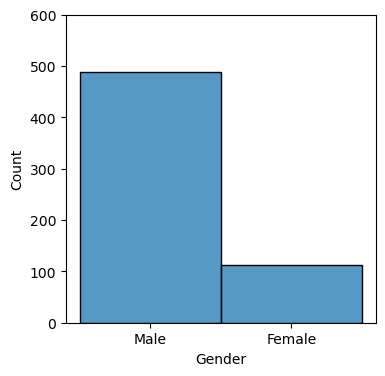

In [6]:
#Analysing gender
plt.figure(figsize=(4,4))
sns.histplot(data=df['Gender'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Gender.describe())
print("The percentage of men versus females applying for a home loan are : \n", df['Gender'].value_counts(normalize=True)*100)
plt.show()

### Univariate analysis of feature : 'Marriage Status' 

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 Yes    65.139116
No     34.860884
Name: Married, dtype: float64


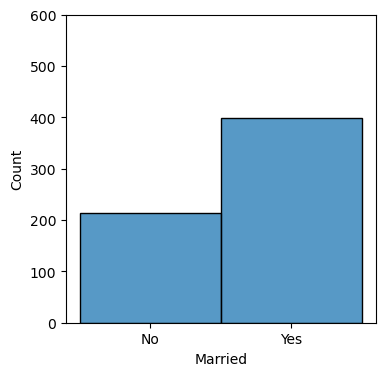

In [7]:
#Analysing Marriage status 
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Married')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Married.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Married.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Dependents' 

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64


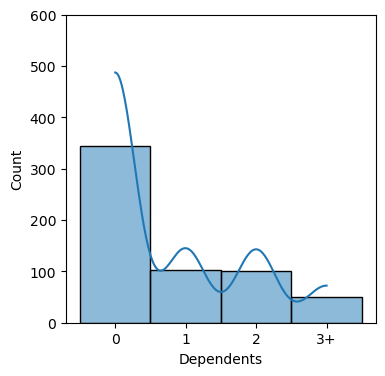

In [8]:
#Analysing the 'Dependent' column
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Dependents', kde=True)
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Dependents.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Dependents.value_counts(normalize = True)*100)
plt.show()

### Univariate analysis of feature : 'Educational Qualification' 

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


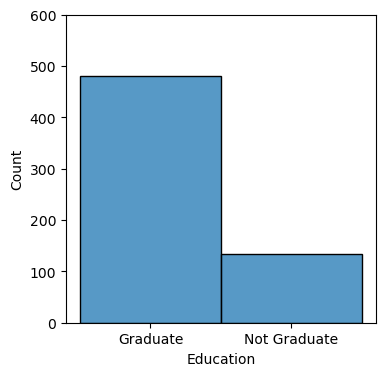

In [9]:
#Analysing Educational qualification
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Education')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Education.describe())
print(df.Education.value_counts())
plt.show()

### Univariate Analysis of Feature : Employ category

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
No     500
Yes     82
Name: Self_Employed, dtype: int64


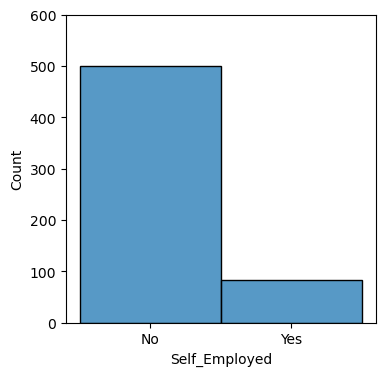

In [10]:
#Analysing the 'Self-Employed' feature
plt.figure(figsize=(4,4))
sns.histplot(data = df['Self_Employed'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Self_Employed.describe())
print(df.Self_Employed.value_counts())
plt.show()

### Univariate analysis of feature : 'Property Area' 

count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


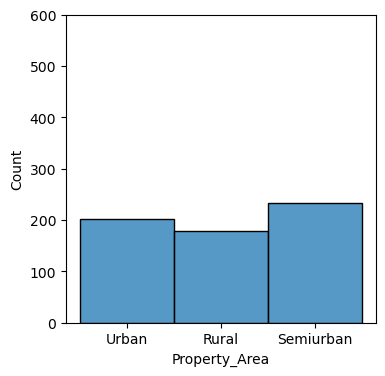

In [11]:
#Analysing property area type
plt.figure(figsize=(4,4))
sns.histplot(data = df['Property_Area'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Property_Area.describe())
print(df.Property_Area.value_counts())
plt.show()

### Univariate analysis of feature : Credit History

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


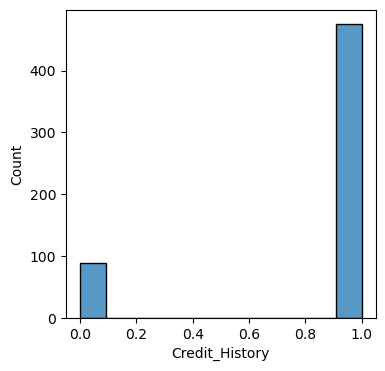

In [12]:
#Analysis of feature 'Credit History'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Credit_History'], kde=False)
print(df.Credit_History.describe())
print(df.Credit_History.value_counts())
#I have a suspicion of some outliers
plt.show()

## Insights : 
* It indicates that far more number of males apply for a home loan that females
* Married people are almost twice as more likely to apply for a home loan than unmarried folks.
* The above analysis shows that people with surplus cash are able to invest it in real estate. Here we can formulate a hypothesis that people with more income tend to have the fiscal ability to buy homes. We will resolve this hypothesis in the coming cells.
* This confirms that a lot more number of graduates are applying for loans. This might be because graduates are more likely to secure a regular income source.
* This confirms our insight from the education feature analysis that people with steady, regular income tend to be able to invest in real estate
* The above analysis shows that property area : Rural, Urban or Semi-Urban have no effect on Loan approval
* People with good credit histroy are more likely to recieve a home loan. This goes to show fiscal literacy and maybe surplus money. This can validate the theory of surplus money allowing investment in real estate and thereby home loan approval.
* No spelling errors

## Univariate Analysis : Continous features
As a part of univariate analysis, we analyse each column individually with its statistical properties

### Univariate analysis of feature : Applicant Income

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


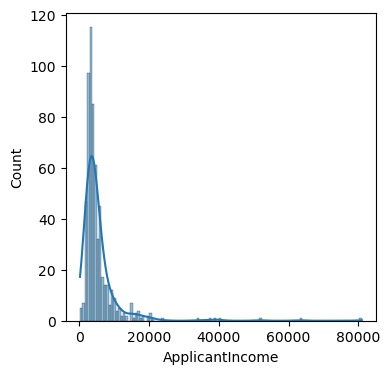

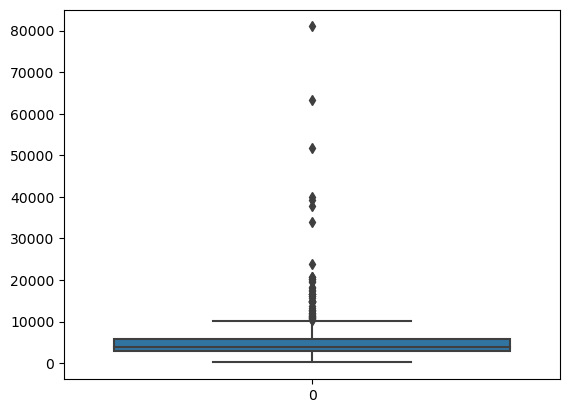

In [13]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['ApplicantIncome'], kde=True)
print(df.ApplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['ApplicantIncome'])
plt.show()


### Univariate analysis of feature : CoApplicant Income

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


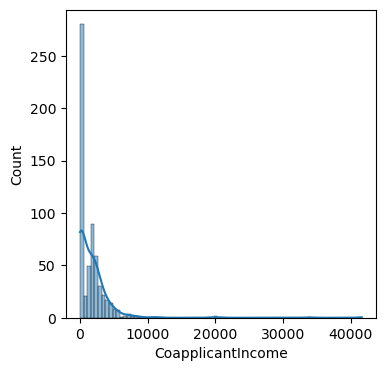

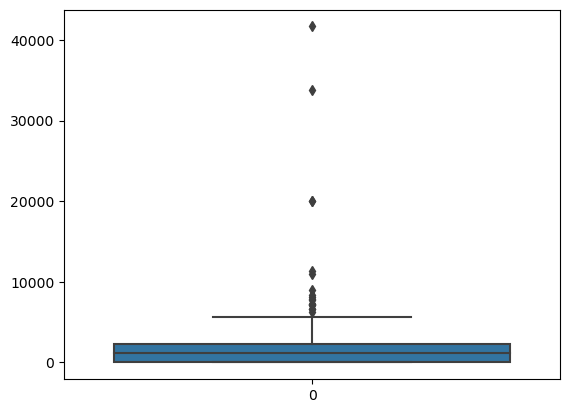

In [14]:
#Analysis of feature 'Applicant Income'
plt.figure(figsize=(4,4))
sns.histplot(data = df['CoapplicantIncome'], kde=True)
print(df.CoapplicantIncome.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['CoapplicantIncome'])
plt.show()

No significant insights gained

### Univariate analysis of feature : Loan Amount

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


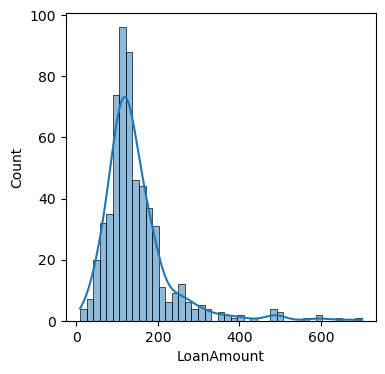

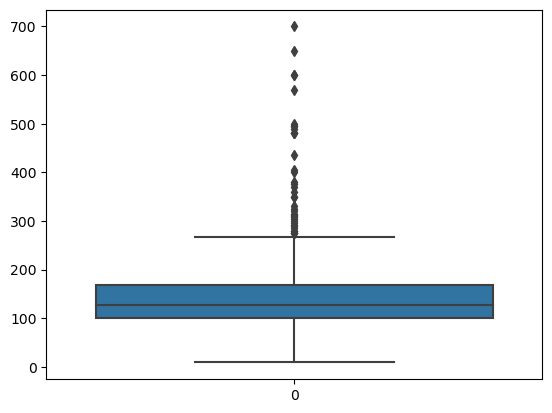

In [15]:
#Analysis of Loan Amount
plt.figure(figsize=(4,4))
sns.histplot(data = df['LoanAmount'], kde=True)
print(df.LoanAmount.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['LoanAmount'])
plt.show()

### Univariate analysis of feature : Loan Term

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


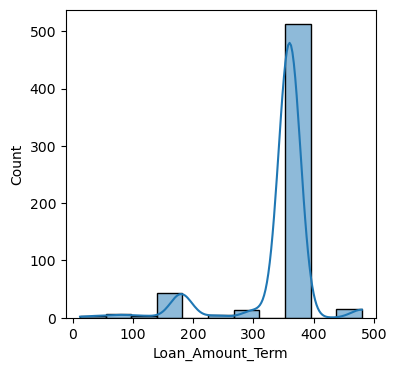

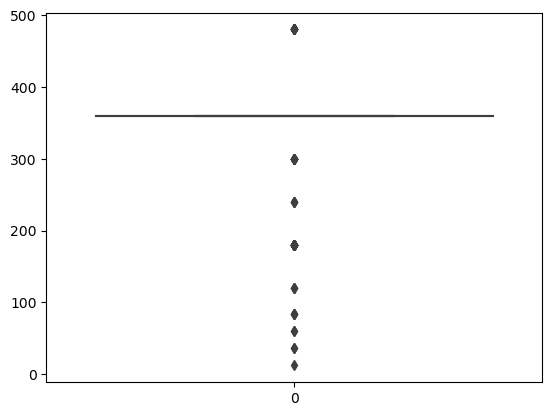

In [16]:
#Analysis of feature 'Loan Term'
plt.figure(figsize=(4,4))
sns.histplot(data = df['Loan_Amount_Term'], kde=True)
print(df.Loan_Amount_Term.describe())
plt.show()
#I have a suspicion of some outliers
sns.boxplot(data=df['Loan_Amount_Term'])
plt.show()

### All the visualizations at a glance

In [17]:
plt.figure(figsize=(4,4))
sns.pairplot(df)
plt.show()

<Figure size 400x400 with 0 Axes>

KeyboardInterrupt: 

## Insights : 
* The applicant income and loan amount is right-skewed, we need to normalize it so that the ML model works well
* We need to deal with outliers, which will be done in the data processing step
* The most common loan duration is of 360 days -> 1 year

## Bivariate Analysis : 
As a part of Bivariate Analysis, we analyse the relationship between two features/variables

### Mutual Information table and Correlation Heatmap

C:\Users\Acer\AppData\Local\Temp\ipykernel_10432\2225912047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


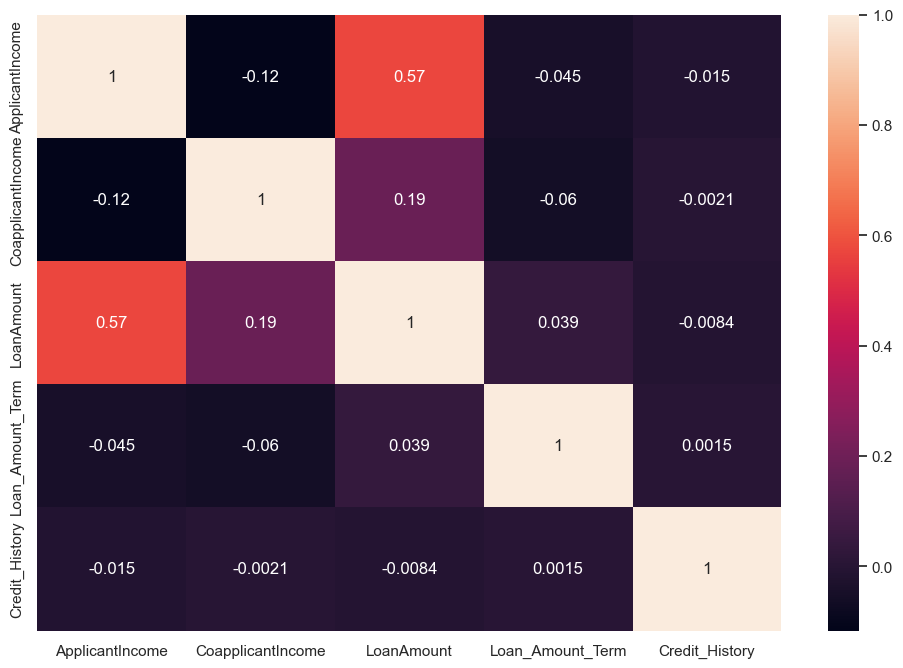

In [ ]:
#We will find the values for Mutual Information later
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

The above heatmap shows some very interesting relations. We will analyse these relations further.

### Bivariate Analysis of : Loan Amout Term and Credit History

<Figure size 400x400 with 0 Axes>

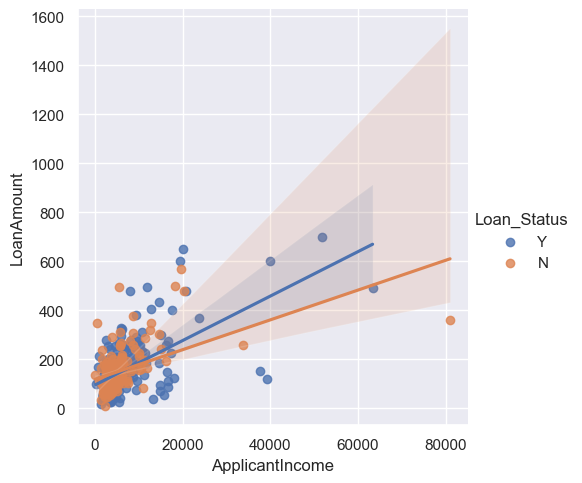

In [ ]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='ApplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()

### Bivariate Analysis : Co-Applicant Income and Loan Amount

<Figure size 400x400 with 0 Axes>

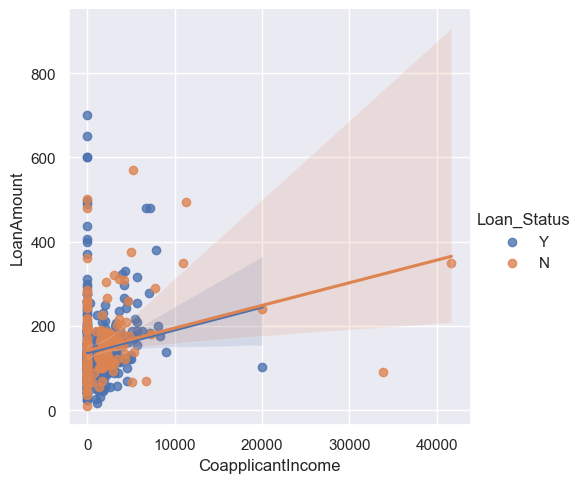

The description of Applicant Income feature : 
 count     614.00
mean     5403.46
std      6109.04
min       150.00
25%      2877.50
50%      3812.50
75%      5795.00
max     81000.00
Name: ApplicantIncome, dtype: float64
The description of Co-Applicant Income feature : 
 count     614.00
mean     1621.25
std      2926.25
min         0.00
25%         0.00
50%      1188.50
75%      2297.25
max     41667.00
Name: CoapplicantIncome, dtype: float64


In [ ]:
#Bivariate analysis of loan amount and applicant income
plt.figure(figsize=(4,4))
sns.lmplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Applicant Income feature : \n",df['ApplicantIncome'].describe())
print("The description of Co-Applicant Income feature : \n", df['CoapplicantIncome'].describe())

### Bivariate Analysis : Loan Amount and Loan Amount Term

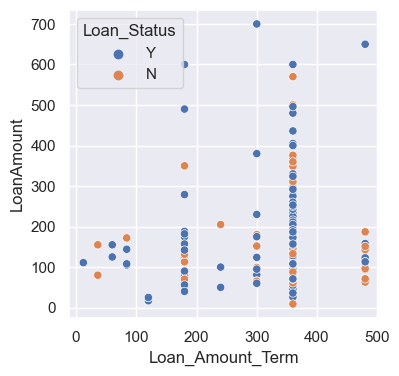

The description of Loan Amount feature : 
 count   592.00
mean    146.41
std      85.59
min       9.00
25%     100.00
50%     128.00
75%     168.00
max     700.00
Name: LoanAmount, dtype: float64
The description of Loan Amount Term feature : 
 count   600.00
mean    342.00
std      65.12
min      12.00
25%     360.00
50%     360.00
75%     360.00
max     480.00
Name: Loan_Amount_Term, dtype: float64


In [ ]:
#Bivariate analysis of Loan Amount and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Loan_Amount_Term', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Loan Amount feature : \n",df['LoanAmount'].describe())
print("The description of Loan Amount Term feature : \n", df['Loan_Amount_Term'].describe())

### Bivariate Analysis : Loan Amount Term and Credit History

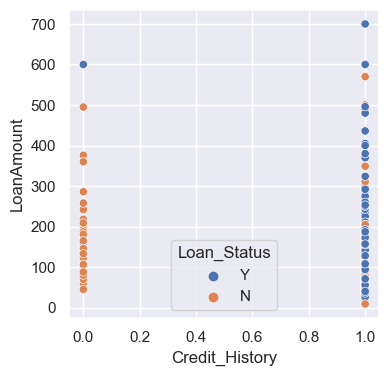

The description of Credit History feature : 
 count   564.00
mean      0.84
std       0.36
min       0.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: Credit_History, dtype: float64
The description of Loan Amount Term feature : 
 count   592.00
mean    146.41
std      85.59
min       9.00
25%     100.00
50%     128.00
75%     168.00
max     700.00
Name: LoanAmount, dtype: float64


In [ ]:
#Bivariate analysis of Credit History and Loan Amount Term
plt.figure(figsize=(4,4))
sns.scatterplot(data=df, x='Credit_History', y='LoanAmount', hue = 'Loan_Status')
plt.show()
print("The description of Credit History feature : \n",df['Credit_History'].describe())
print("The description of Loan Amount Term feature : \n", df['LoanAmount'].describe())

### Bivariate Analysis : Gender and Married

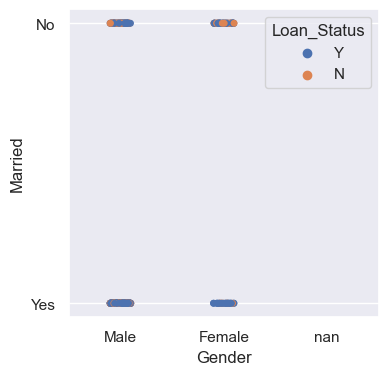

Married    No   Yes
Gender             
Female  72.07 27.93
Male    26.69 73.31


In [ ]:
#Analysing gender and married status together
plt.figure(figsize=(4,4))
sns.stripplot(data = df, x = 'Gender', y = 'Married', hue = 'Loan_Status')
plt.show()
#To confirm the insights
freq_table = pd.crosstab(df['Gender'], df['Married'], normalize='index')*100
print(freq_table)

### Bivariate Analysis : Gender and Dependents

Dependents     0     1     2   3+
Gender                           
Female     73.39 17.43  6.42 2.75
Male       54.09 17.19 19.29 9.43


d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\anafiles\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


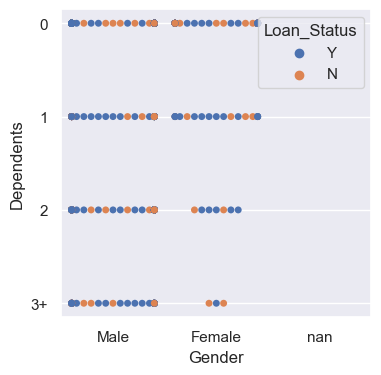

In [ ]:
#Analyse Gender and Dependents
plt.figure(figsize=(4,4))
print(pd.crosstab(df['Gender'],df['Dependents'], normalize='index')*100)
sns.swarmplot(data=df, x = 'Gender', y = 'Dependents', hue = 'Loan_Status')
plt.show()

### Bivariate analysis : Education and Self-Employed

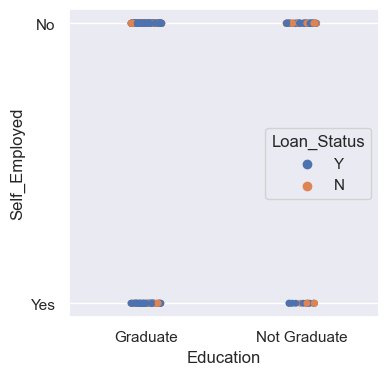

Self_Employed    No   Yes
Education                
Graduate      85.68 14.32
Not Graduate  86.72 13.28


In [ ]:
#Analysing 'Education' and 'Self-Employed' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Education', y = 'Self_Employed', hue = 'Loan_Status')
plt.show()

print(pd.crosstab(df['Education'], df['Self_Employed'], normalize='index')*100)

### Bivariate Analysis : Marriage Status , Loan Amount

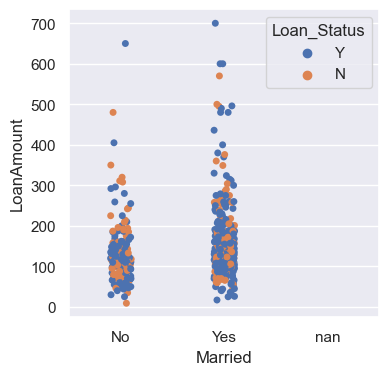

In [ ]:
#Analysing 'Married' and 'Loan Amount' features
plt.figure(figsize=(4,4))
sns.stripplot(data=df, x = 'Married', y = 'LoanAmount', hue = 'Loan_Status')
plt.show()

## Insights : 
* Loan Amount tends to be more for a applicants with greater income
* No significant influence of income of co-applicant on loan status
* No discernable relation between loan amount and loan term
* People with good credit history tend to apply for larger loans
* Married males tend to usually apply for home loans.
    * Females, in general, tend to apply less for hoam loans.
    * Even less are awareded home loans
* Females are less likely to have 2,3 or more dependents. Those of them who do apply for loans have very slim chances of having their home loans approved.
* Contrary to common thinking, marital status and loan amount have no discernable relation.

## Data Cleaning : 
In the data cleaning and preprocessing steps, we clean the data and make it suitable for further processing.
Since this is the data cleaning step, we will have to clean the train and test data separately
With this objective, we'll be doing the following : 
* Dealing with missing values using imputers
* Dealing with numerical variables:
    * Remove the outliers
    * Scaling the data
    * Normalizing the data
* Dealing with categorical variables
* Since there are no spelling errors, we can skip the step.

### Dealing with Missing values

In [255]:
#First, we inspect the data again.
#'train' -> df
#'test' -> everything except the Loan_status column
#Now we will clean the data
train.head()
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,Yes,0,Graduate,No,Urban,5720.00,0.00,110.00,360.00,...,0,0,0,1,0,1,0,0,0,1
1,Male,Yes,1,Graduate,No,Urban,3076.00,1500.00,126.00,360.00,...,1,0,0,1,0,1,0,0,0,1
2,Male,Yes,2,Graduate,No,Urban,5000.00,1800.00,208.00,360.00,...,0,1,0,1,0,1,0,0,0,1
3,Male,Yes,2,Graduate,No,Urban,2340.00,2546.00,100.00,360.00,...,0,1,0,1,0,1,0,0,0,1
4,Male,No,0,Not Graduate,No,Urban,3276.00,0.00,78.00,360.00,...,0,0,0,0,1,1,0,0,0,1


In [256]:
#We will now drop the 'Loan_ID' column as it is does not provide any insight into the loan status
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

KeyError: "['Loan_ID'] not found in axis"

In [ ]:
#Inspect the chaanges
print(train.shape)
test.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.00,360.00,1.00,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.00,360.00,1.00,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.00,360.00,1.00,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.00,360.00,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.00,360.00,1.00,Urban


In [257]:
#Now, we first check for missing values in the dataset
test.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
Property_Area              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [258]:
#We will also separate the target variable from the train data
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [259]:
loan_status = [1 if val=='Y' else 0 for val in y.loc[:]]
loan_status = pd.DataFrame(loan_status, index=y.index)
y = loan_status
y.rename(columns={0:'Loan_Status'}, inplace=True)
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [260]:
#To deal with missing values, we first have to spearate the numerical versus the categorical data
#This is because we need to apply different imputer strategies for numerical and categorical data 
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

In [261]:
X[cat_cols].shape

(614, 6)

In [262]:
#We first import the imputers
from sklearn.impute import SimpleImputer

#Creating imputer objects
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

#Selecting the cols for the respective imputers

df_cat_train = X[cat_cols]
df_num_train = X[num_cols]
df_cat_test = test[cat_cols]
df_num_test = test[num_cols]

# Fit the imputer on the training data and transform the training data
df_cat_train = pd.DataFrame(cat_imputer.fit_transform(df_cat_train), columns=df_cat_train.columns)
df_num_train = pd.DataFrame(num_imputer.fit_transform(df_num_train), columns=df_num_train.columns)

# Transform the test data using the imputer fitted on the training data
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=df_cat_test.columns)
df_num_test = pd.DataFrame(num_imputer.transform(df_num_test), columns=df_num_test.columns)

#Cross-checking to make sure that the values are imputed
# print(df_cat.isnull().sum())
# print(df_num.isnull().sum())
# print(df_cat.head(10))
# print(df_num.head(10))
print(df_cat_train.shape)
print(df_num_train.shape)
print(df_cat_test.shape)
print(df_num_test.shape)
print(X.shape)
#Joining the two dataframes
X = pd.concat([df_cat_train, df_num_train], axis=1)
test = pd.concat([df_cat_test, df_num_test], axis=1)
#Renaming the features
X.columns = ['Gender', 'Married',	'Dependents','Education','Self_Employed','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
test.columns = X.columns
print(X.head())
print(X.isnull().sum())
print(test.head())

(614, 6)
(614, 5)
(367, 6)
(367, 5)
(614, 11)
  Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          5849.00               0.00      146.41            360.00   
1          4583.00            1508.00      128.00            360.00   
2          3000.00               0.00       66.00            360.00   
3          2583.00            2358.00      120.00            360.00   
4          6000.00               0.00      141.00            360.00   

   Credit_History  
0            1.00  
1            1.00  
2            1.00  
3       

In [263]:
#To check if all the values are imputed
print(X.isnull().sum())
print(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


### Dealing with categorical variables

In [264]:
#Now, we will now deal with categorical variables
#For that purpose, we will make dummies using the get_dummies() function offered by pandas
X_cat = pd.get_dummies(data=X[cat_cols])
test_cat = pd.get_dummies(data=test[cat_cols])
print(X_cat.isnull().sum())
print(X_cat.shape)

Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64
(614, 15)


In [265]:
#Now, we will drop the original categorical columns from the original dataframe

X.drop(cat_cols, axis=1, inplace=True)
test.drop(cat_cols, axis=1, inplace=True)

#Now, we will join the dummies with the original dataframe
X = pd.concat([X, X_cat], axis=1)
test = pd.concat([test, test_cat], axis=1)

X_cat.shape

(614, 15)

In [274]:
X.head()
test.head()
X.shape
# test.shape

(614, 20)

### Dealing with Numerical data

#### Dealing with Outliers

<Figure size 2200x1200 with 0 Axes>

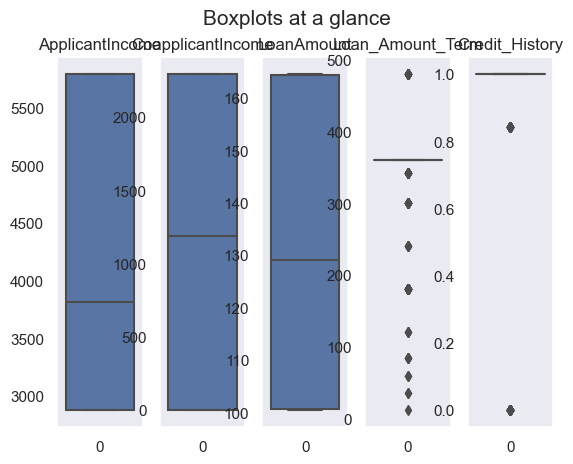

In [275]:
#We will now deal with outliers in the group
#To figure out the outliers, we will make a boxplot
plt.figure(figsize=(22,12), dpi=100, facecolor='w', edgecolor='k')
sns.set_theme(style='dark')

figure, ax = plt.subplots(nrows=1, ncols=5)
figure.suptitle('Boxplots at a glance', fontsize=15)

# For train data
counter=0
for i in range(0,5,1):
    sns.boxplot(X[num_cols[counter]], ax=ax[i])
    ax[i].set_title(num_cols[counter]) 
    counter+=1
plt.show()

(614, 20)


<Figure size 1800x1200 with 0 Axes>

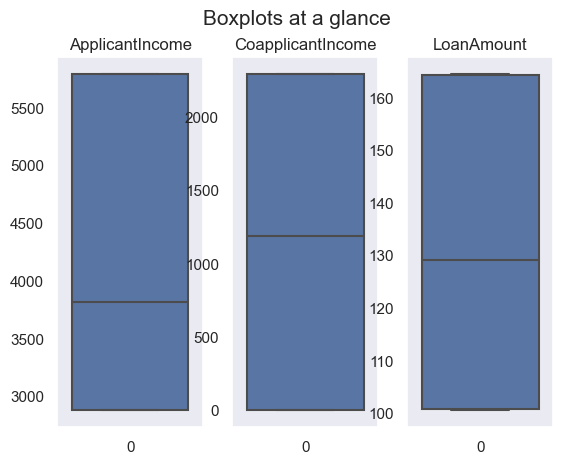

In [276]:
#To deal with outliers in coapplicant income and loan amount, we will use the z-score method
features_with_outliers = ['ApplicantIncome',	'CoapplicantIncome'	,'LoanAmount']
X[features_with_outliers].head()

#making a function for Z-method
for feat in features_with_outliers:
    lowlim = X[feat].quantile(0.25)
    uplim = X[feat].quantile(0.75)
    X[feat] = [uplim if val>=uplim else val for val in X[feat]]
    X[feat] = [lowlim if val<=lowlim else val for val in X[feat]]

print(X.shape)
# X[features_with_outliers[0]].shape
#Plotting to check the removal of outliers
plt.figure(figsize=(18,12))
sns.set_theme(style='dark')
figure, ax = plt.subplots(nrows=1, ncols=3)
figure.suptitle('Boxplots at a glance', fontsize=15)
counter=0
for i in range(0,3,1):
    sns.boxplot(X[features_with_outliers[counter]], ax=ax[i])
    ax[i].set_title(features_with_outliers[counter]) 
    counter+=1
    


#### Scaling and Normalizing

<Figure size 400x400 with 0 Axes>

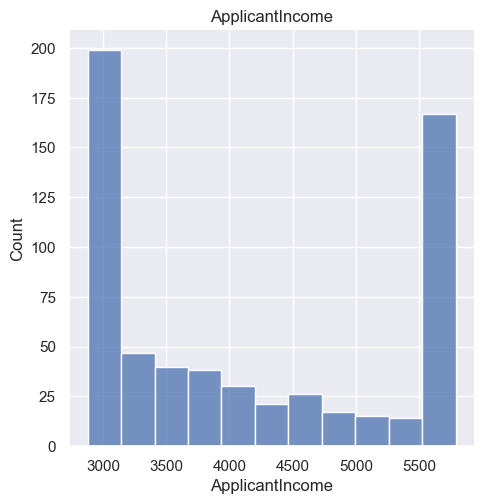

<Figure size 400x400 with 0 Axes>

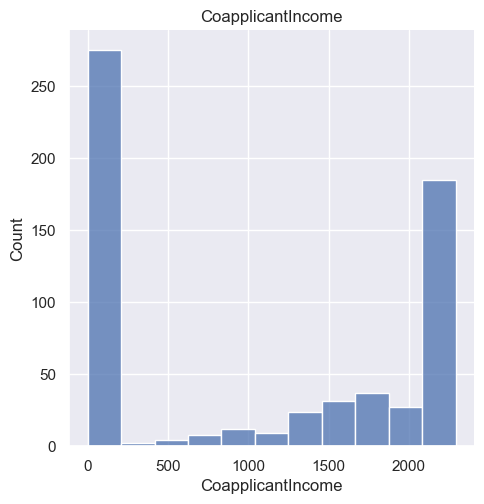

<Figure size 400x400 with 0 Axes>

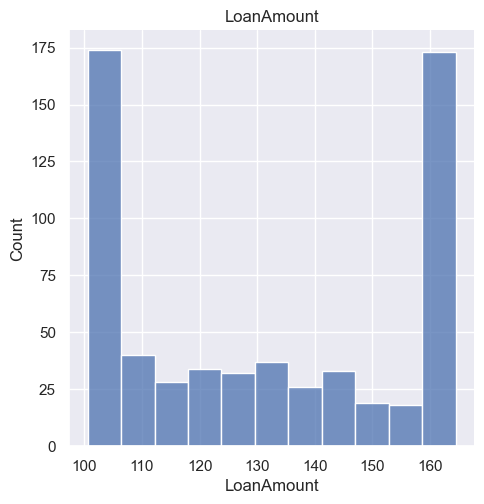

<Figure size 400x400 with 0 Axes>

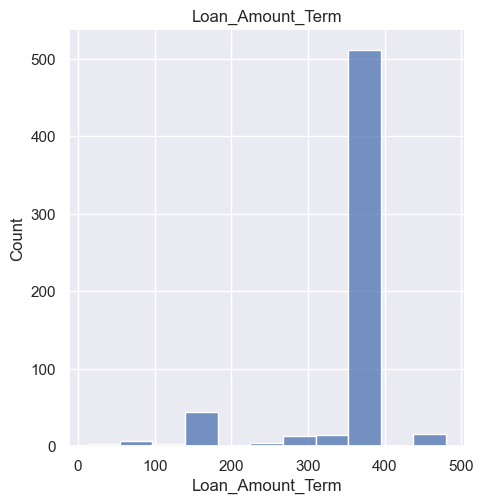

<Figure size 400x400 with 0 Axes>

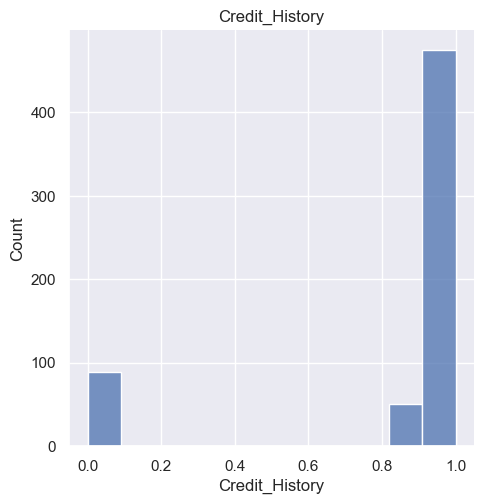

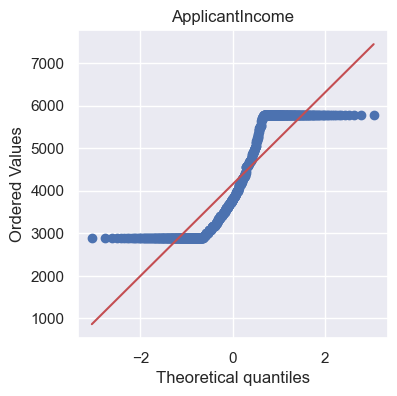

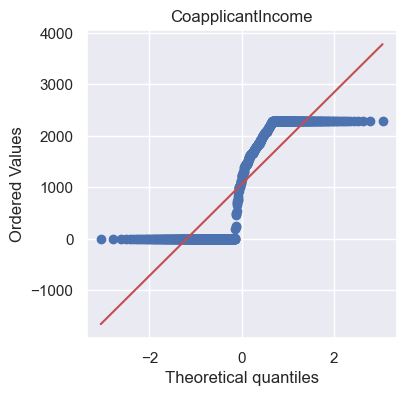

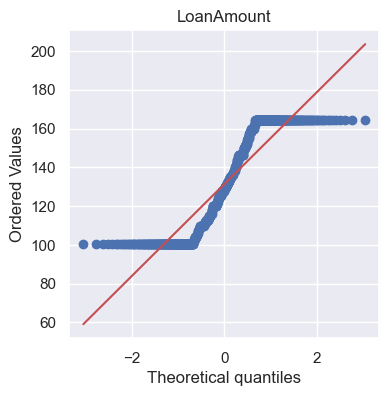

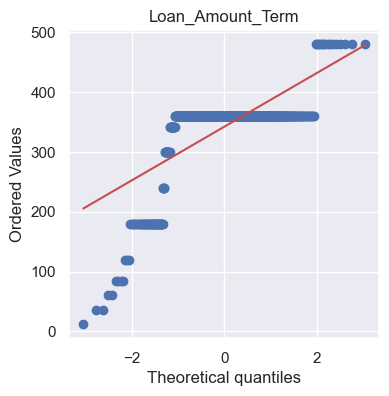

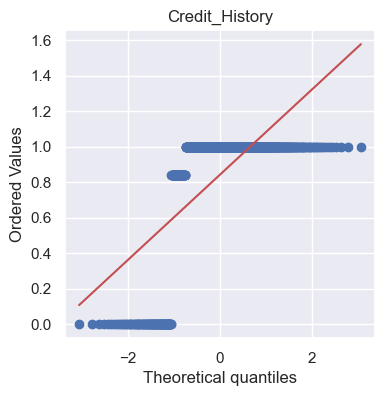

In [277]:
#For normalization, we use the PowerTransform class
#Since it already standardizes the data, we have no extra need of a StandardScaler
import scipy.stats as stats

#We first plot the features that require a power transformation
for col in num_cols:
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(4,4))
    sns.displot(data=X[col])
    plt.title(col)
    # plt.subplot(122)
    # stats.probplot(new_df[col], dist='norm', plot=plt)
for col in num_cols:
    sns.set_theme(style='darkgrid')
    plt.figure(figsize=(4,4))
    stats.probplot(x=X[col], dist='norm', plot=plt)
    plt.title(col)
    plt.show()


In [280]:
#Now to apply the transformation
from sklearn.preprocessing import PowerTransformer

yj = PowerTransformer(method='yeo-johnson')
new_nums = pd.DataFrame(yj.fit_transform(X[num_cols]))

new_nums.columns = num_cols
#To replace the original columns with the transformed columns
X[num_cols] = new_nums[num_cols]

#Since the data was very skewed, we werent able to produce as much influence over the distribution

## Feature Engineering:
* We will now be analyzing the relationship between different features and the target variable in order choose suitable features for training our model.
* We will also attempt to derive better features that can also share a close relation to the target variable


In [282]:
#From the above gained insights, I summed the most suitable features
suitable_feat = ['Gender_Male', 'Dependents_0', 'Dependents_1', 'Education_Graduate']
X['Sum_suitable'] = X[suitable_feat].sum(axis=1)

In [285]:
#We can also add some more features to aid the model
X['TotalIncome'] = X['ApplicantIncome']+X['CoapplicantIncome']
X['EMI'] = X['LoanAmount']*30/X['Loan_Amount_Term']
X.head()
print(X.shape)

(614, 23)


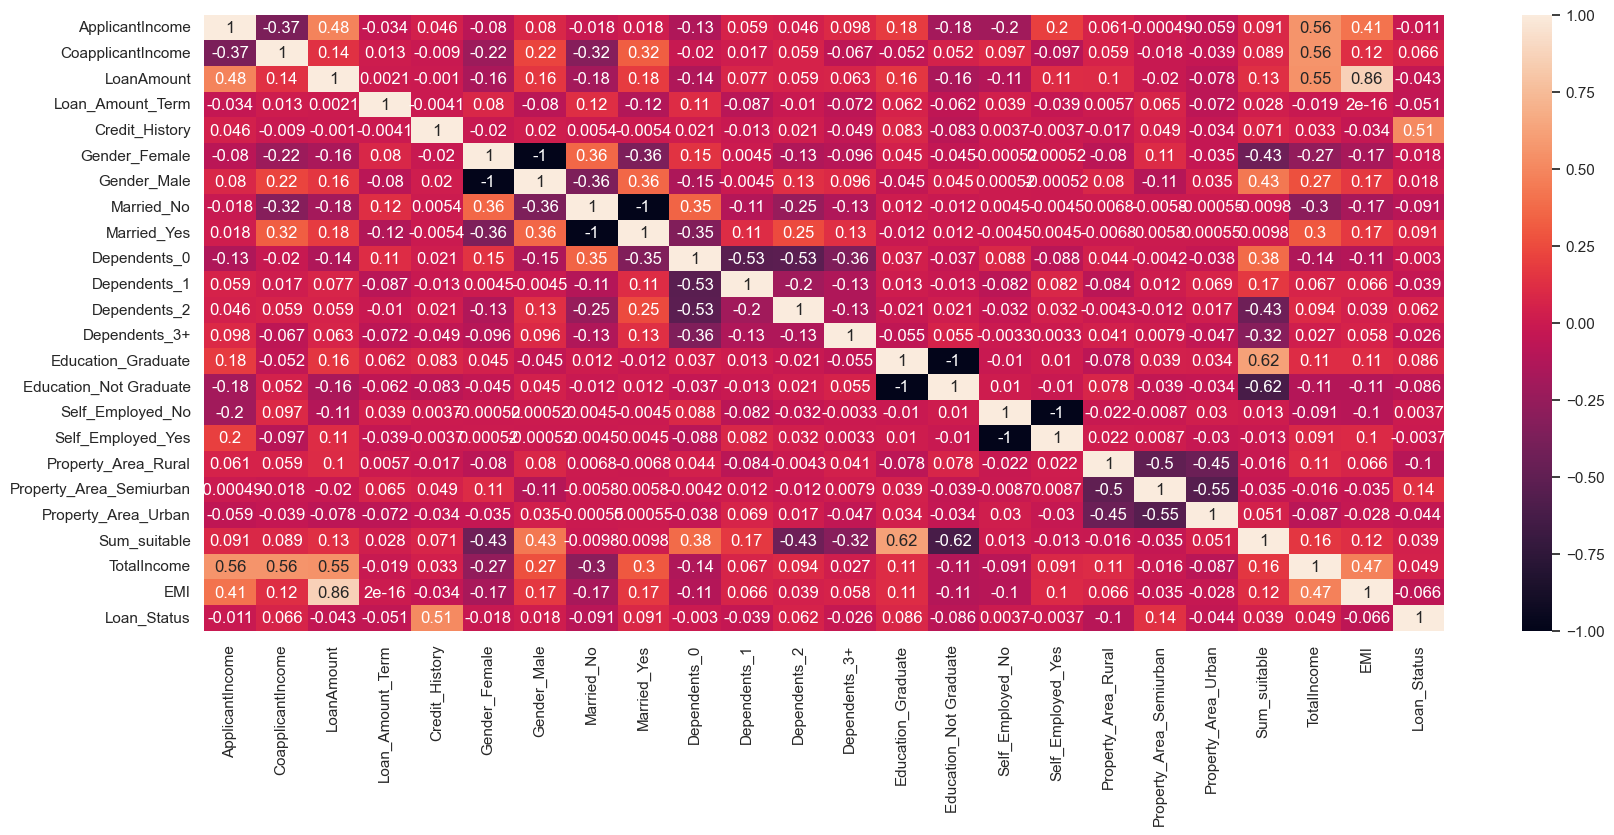

In [286]:
#Lets draw one more heatmap to now analyze the relations between categorical variables too

plt.figure(figsize=(20,8))
sns.heatmap(data=X.join(y).corr(),annot=True)
plt.show()

## Training the model

To train and test the efficiency of various models, there exists a library called LazyPredict that will show the summary of after all the ML models have been applied

In [287]:
#Before feature engineering, we need to separate the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [295]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)
print(predictions)


  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:03<00:00,  9.26it/s]

[LightGBM] [Info] Number of positive: 338, number of negative: 153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.688391 -> initscore=0.792608
[LightGBM] [Info] Start training from score 0.792608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [296]:
#Fine tuning the best performing model(LGBM classifier) using GridSearchCV
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

#Defining the parameters

params = {'learning_rate': [0.01, 0.1, 0.2, 0.3],
            'n_estimators': [100, 200, 300, 400, 500],
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
            'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90]}
grid = GridSearchCV(estimator=lgbm, param_grid=params, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 338, number of negative: 153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.688391 -> initscore=0.792608
[LightGBM] [Info] Start training from score 0.792608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [300]:
#Finding the most important features using the best parameters
from sklearn.feature_selection import SelectFromModel

lgbm = LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, num_leaves=10)
lgbm.fit(X_train, y_train)
feat_importance = pd.DataFrame(lgbm.feature_importances_, index=X_train.columns, columns=['Importance'])
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 338, number of negative: 153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.688391 -> initscore=0.792608
[LightGBM] [Info] Start training from score 0.792608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [303]:
# Align the columns of the test data with the training data
test = test.reindex(columns=X_train.columns)

# Make predictions on the aligned test data
y_pred = grid.predict(test)
y_pred = pd.DataFrame(y_pred, columns=['Loan_Status'])
y_pred.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [304]:
y_pred['Loan_Status'] = ['Y' if val==1 else 'N' for val in y_pred['Loan_Status']]
#This is the final submission file
y_pred.to_csv('home-loan/submission.csv', index=False)